<a href="https://colab.research.google.com/github/SophieShin/ML_selfstudy/blob/main/OptionVolatilityEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Programming for AI')    ## 현재 작업 환경으로 설정한 경로를 입력하세요

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('OptionVolatility.csv', encoding = 'cp949')

In [4]:
data.shape

(167849, 14)

In [5]:
data.info()
# null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167849 entries, 0 to 167848
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Code                167849 non-null  object 
 1   Name                167849 non-null  object 
 2   Date                167849 non-null  int64  
 3   Types               167849 non-null  object 
 4   CallPut             167849 non-null  object 
 5   StrikePrice         167849 non-null  float64
 6   ScaledStrikePrice   167849 non-null  float64
 7   LastPrice           167849 non-null  float64
 8   RemainingDays       167849 non-null  int64  
 9   RiskFreeRate        167849 non-null  float64
 10  OptionDividendRate  167849 non-null  float64
 11  UnderlyingIndex     167849 non-null  float64
 12  VKOSPI              167849 non-null  float64
 13  ImpliedVolatility   167849 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 17.9+ MB


In [6]:
data.describe()

,Date,StrikePrice,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI,ImpliedVolatility
count,1.678490e+05,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000,167849.000000
mean,2.020090e+07,285.516059,-8.068731,8.044378,78.327276,0.009424,1.164245,305.687886,26.405780,0.314770
std,3.676041e+03,62.472991,23.450348,17.453706,126.295958,0.003253,2.103931,49.848465,10.149168,0.206463
min,2.019120e+07,140.000000,-118.920000,0.010000,1.000000,0.006300,0.000000,199.280000,12.810000,0.030000
25%,2.020032e+07,242.500000,-22.624000,0.230000,21.000000,0.006600,0.000000,278.130000,20.540000,0.191000
50%,2.020070e+07,287.500000,-5.252000,1.540000,44.000000,0.007900,0.606689,297.740000,24.150000,0.260000
75%,2.020102e+07,325.000000,7.676000,7.800000,78.000000,0.011000,0.840140,318.390000,30.200000,0.381000
max,2.021020e+07,500.000000,80.288000,290.200000,1099.000000,0.015300,18.490427,437.300000,69.240000,5.775000


In [7]:
data.columns

Index(['Code', 'Name', 'Date', 'Types', 'CallPut', 'StrikePrice',
       'ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate',
       'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI', 'ImpliedVolatility'],
      dtype='object')

In [8]:
# Feature(X)와 Target(y) 선언하기

X = data[['CallPut','ScaledStrikePrice', 'LastPrice', 'RemainingDays', 'RiskFreeRate', 'OptionDividendRate', 'UnderlyingIndex', 'VKOSPI']]
y = data['ImpliedVolatility']

In [9]:
X

,CallPut,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI
0,C,-39.180,95.00,10,0.0070,0.000000,415.45,34.16
1,C,-36.180,88.30,10,0.0070,0.000000,415.45,34.16
2,C,-36.180,89.20,39,0.0070,0.000000,415.45,34.16
3,C,-30.180,80.55,130,0.0070,0.606411,415.45,34.16
4,C,-26.180,52.00,10,0.0070,0.000000,415.45,34.16
...,...,...,...,...,...,...,...,...
167844,P,-0.976,0.70,4,0.0153,0.000000,277.44,13.96
167845,P,0.024,1.56,4,0.0153,0.000000,277.44,13.96
167846,P,1.024,2.99,4,0.0153,0.000000,277.44,13.96
167847,P,2.024,5.25,4,0.0153,0.000000,277.44,13.96


In [10]:
# categorical data(CallPut) one-hot-encoding 하기
X_features_ohe = pd.get_dummies(X, columns = ['CallPut'])
X_features_ohe

,ScaledStrikePrice,LastPrice,RemainingDays,RiskFreeRate,OptionDividendRate,UnderlyingIndex,VKOSPI,CallPut_C,CallPut_P
0,-39.180,95.00,10,0.0070,0.000000,415.45,34.16,1,0
1,-36.180,88.30,10,0.0070,0.000000,415.45,34.16,1,0
2,-36.180,89.20,39,0.0070,0.000000,415.45,34.16,1,0
3,-30.180,80.55,130,0.0070,0.606411,415.45,34.16,1,0
4,-26.180,52.00,10,0.0070,0.000000,415.45,34.16,1,0
...,...,...,...,...,...,...,...,...,...
167844,-0.976,0.70,4,0.0153,0.000000,277.44,13.96,0,1
167845,0.024,1.56,4,0.0153,0.000000,277.44,13.96,0,1
167846,1.024,2.99,4,0.0153,0.000000,277.44,13.96,0,1
167847,2.024,5.25,4,0.0153,0.000000,277.44,13.96,0,1


  Using cached mglearn-0.1.9-py2.py3-none-any.whl


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee8ca9ed90>,
      dtype=object)

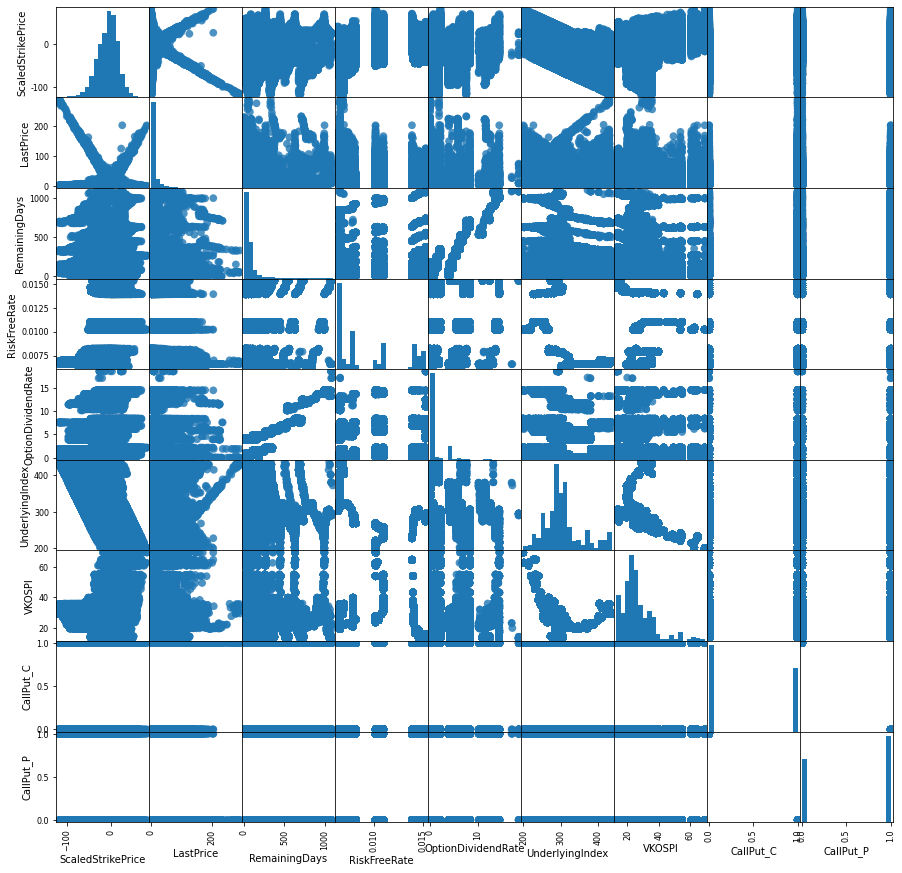

In [12]:
!pip install mglearn

import mglearn

features =pd.DataFrame(X_features_ohe, columns=X_features_ohe.columns)
pd.plotting.scatter_matrix(features, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)

In [13]:
# train, test set 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X_features_ohe, y, test_size=0.3, random_state=5)

In [14]:
# 차원 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117494, 9), (50355, 9), (117494,), (50355,))

In [15]:
# 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

# *Linear Regression 계열

In [ ]:
# 1번 Linear Regression 모델

from sklearn.linear_model import LinearRegression
lr = linear_model.LinearRegression()
lr.fit(train_scaled, y_train)
pred = lr.predict(test_scaled)

print('Training accuracy : {:.3f}'.format(lr.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lr.score(test_scaled, y_test)))


Training accuracy : 0.412
Test accuracy : 0.410


In [ ]:
# 2번 Ridge 모델

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(ridge.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(ridge.score(test_scaled, y_test)))

Training accuracy : 0.412
Test accuracy : 0.410


In [ ]:
# 3번 Lasso 모델
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(train_scaled, y_train)

print('Training accuracy : {:.3f}'.format(lasso.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(lasso.score(test_scaled, y_test)))

Training accuracy : 0.399
Test accuracy : 0.395


# * Tree 계열

In [ ]:
# 1번 모델 Decision Tree(Single Model)

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=5)
dt.fit(train_scaled, y_train)

print(dt.score(train_scaled, y_train))
print(dt.score(test_scaled, y_test))

0.9999999949454184
0.9570399741074154


In [ ]:
# 2번 모델 RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 100,n_jobs = -1,oob_score = True, random_state = 5)
forest.fit(train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=5, verbose=0, warm_start=False)

In [ ]:
# RandomForest 성능

print('Training accuracy : {:.3f}'.format(forest.score(train_scaled,y_train)))
print('Test accuracy : {:.3f}'.format(forest.score(test_scaled, y_test)))

Training accuracy : 0.994
Test accuracy : 0.969


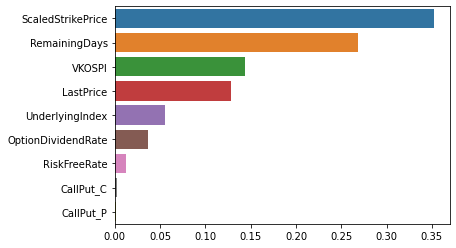

In [ ]:
# feature importance 비교

feature_series = pd.Series(data = forest.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
# 3번 모델 Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state = 0)
gbr.fit(train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Gradient Boosting Regressor 성능

print('Training accuracy : {:.3f}'.format(gbr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(gbr.score(test_scaled, y_test)))


Training accuracy : 0.872
test Accuracy: 0.879


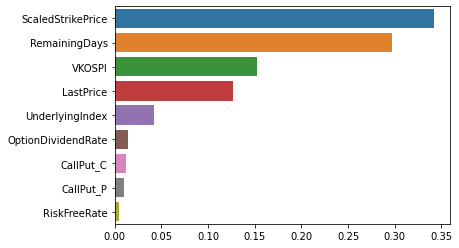

In [ ]:
# feature importance 비교

feature_series = pd.Series(data = gbr.feature_importances_, index = X_features_ohe.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
# 4번 모델 AdaBoost 모델
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(random_state = 0)
abr.fit(train_scaled, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=0)

In [ ]:
print('Training accuracy : {:.3f}'.format(abr.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(abr.score(test_scaled, y_test)))

Training accuracy : -0.192
test Accuracy: -0.175


In [ ]:
# 5번 모델 Bagging

from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(DecisionTreeRegressor(), n_estimators =100, oob_score = True, n_jobs = -1, random_state = 0 )
bagging.fit(train_scaled, y_train)


BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [ ]:
print('Training accuracy : {:.3f}'.format(bagging.score(train_scaled,y_train)))
print('test Accuracy: {:.3f}'.format(bagging.score(test_scaled, y_test)))
print('OOB sample Accuracy : {:.3f}'.format(bagging.oob_score_))

Training accuracy : 0.994
test Accuracy: 0.969
OOB sample Accuracy : 0.959


In [16]:
# SVR 모델

from sklearn.svm import LinearSVR
svr= LinearSVR(max_iter = 10000)
svr.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(svr.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svr.score(test_scaled,y_test)))


훈련 세트 정확도: 0.38
테스트 세트 정확도:0.37


In [ ]:
# K-Nearest Neighbors 모델
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(train_scaled,y_train)

print("훈련 세트 정확도: {:.2f}".format(knn.score(train_scaled,y_train)))
print("테스트 세트 정확도:{:.2f}".format(knn.score(test_scaled,y_test)))

훈련 세트 정확도: 0.93
테스트 세트 정확도:0.90
